Link to this notebook: https://colab.research.google.com/drive/1d46v2F8soNRXdnRpZbDYPLnDPIbXVq4_?usp=sharing

# Imports & Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from IPython.display import Image, display
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DESIGNTK 530/I-7/study_performance.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Data Description**

This [dataset](https://drive.google.com/file/d/16x6RDLVeXAXSjxZCVkbilZP9B9GmnNyF/view?usp=drive_link) from [Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance/data) contains information on student test scores alongside various socioeconomic factors. Key variables include gender, race, parental highest level of education and other preparatory indicators. The data aims to provide insights into how different backgrounds and preparatory factors influence academic performance.


---


**Objectives / Goals**

My primary objective is to analyze how factors such as gender, race, and parental highest level of education impact students' final test scores. By examining these variables, we aim to assess the presence of educational equity within the student population and identify any disparities that may exist.

# 2

## 2.1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Lets rename the columns so they are more legible.

In [6]:
df = df.rename(columns={
    'gender': 'Gender',
    'race_ethnicity': 'Race/Ethnicity',
    'parental_level_of_education': 'Parental Education Level',
    'lunch': 'Lunch Status',
    'test_preparation_course': 'Test Preparation Course',
    'math_score': 'Math Score',
    'reading_score': 'Reading Score',
    'writing_score': 'Writing Score'
})

Lets use booleans to indicate whether the students completed a test prep course.

In [7]:
df['Test Preparation Course'].unique()

array(['none', 'completed'], dtype=object)

In [8]:
df['Test Preparation Course'] = df['Test Preparation Course'].replace({'none': False, 'completed': True})

<ipython-input-8-54a52fefa175>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Test Preparation Course'] = df['Test Preparation Course'].replace({'none': False, 'completed': True})


Similarly, lets use booleans to indicate whether students qualified for free or reduced lunch.

In [9]:
df['Lunch Status'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [10]:
df = df.rename(columns={'Lunch Status': 'Free/Reduced Lunch'})
df['Free/Reduced Lunch'] = df['Free/Reduced Lunch'].replace({'free/reduced': True, 'standard': False})

<ipython-input-10-25ae8837b408>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Free/Reduced Lunch'] = df['Free/Reduced Lunch'].replace({'free/reduced': True, 'standard': False})


## 2.2

In [11]:
df.mode()

,Gender,Race/Ethnicity,Parental Education Level,Free/Reduced Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score
0,female,group C,some college,False,False,65,72,74


In [12]:
q_cols = ['Math Score', 'Reading Score', 'Writing Score']

desc_stats = df[q_cols].describe().loc[['mean', '50%', 'std']]
desc_stats = desc_stats.rename(index={'50%': 'median'})

modes = df[q_cols].mode().iloc[0]

summary = desc_stats.transpose()
summary['mode'] = modes
summary

,mean,median,std,mode
Math Score,66.089,66.0,15.163080,65
Reading Score,69.169,70.0,14.600192,72
Writing Score,68.054,69.0,15.195657,74


In [13]:
q_d_cols = [col for col in df.columns if 'score' not in col.lower()]

fq_tables = {}
for column in q_d_cols:
    fq_tables[column] = df[column].value_counts()

for name, table in fq_tables.items():
    print(f'Frequency Table for {name}:')
    print(table.to_string())
    print('\n')

Frequency Table for Gender:
Gender
female    518
male      482


Frequency Table for Race/Ethnicity:
Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89


Frequency Table for Parental Education Level:
Parental Education Level
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59


Frequency Table for Free/Reduced Lunch:
Free/Reduced Lunch
False    645
True     355


Frequency Table for Test Preparation Course:
Test Preparation Course
False    642
True     358




## 2.3

In [14]:
df['Average Score'] = df[['Math Score', 'Reading Score', 'Writing Score']].mean(axis=1)

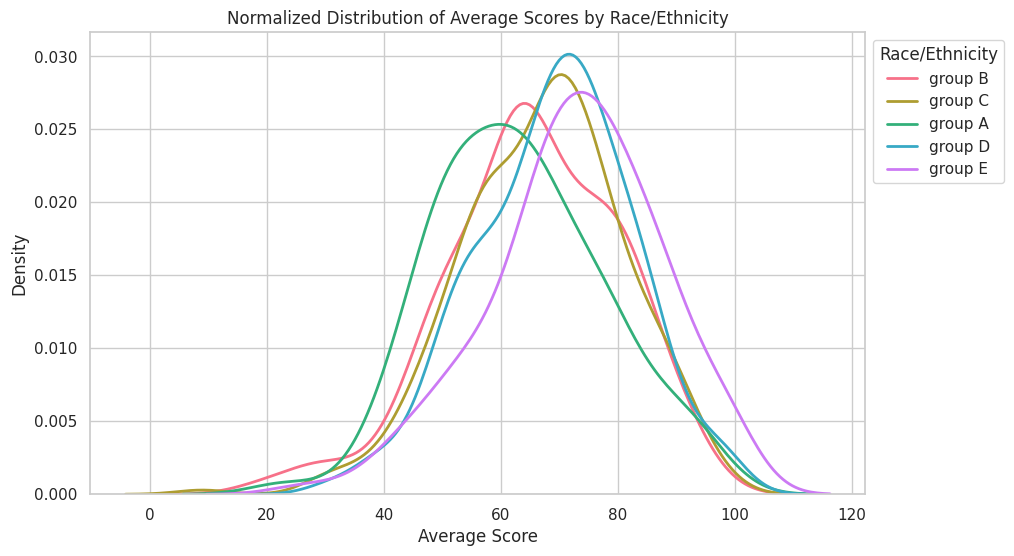

In [15]:
plt.figure(figsize=(10, 6))

sns.set(style='whitegrid')

palette = sns.color_palette('husl', n_colors=df['Race/Ethnicity'].nunique())

for i, race in enumerate(df['Race/Ethnicity'].unique()):
    subset = df[df['Race/Ethnicity'] == race]
    sns.kdeplot(subset['Average Score'], color=palette[i], label=race, lw=2)

plt.title('Normalized Distribution of Average Scores by Race/Ethnicity')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.legend(title='Race/Ethnicity', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

On this graph, we can see that there is a noticeable difference in average scores when grouped by race/ethnicity, suggesting that students' educational outcomes may be influenced by their racial or ethnic backgrounds.

<ipython-input-16-0408f59e4b4e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Paid Lunch', 'Free/Reduced Lunch'])


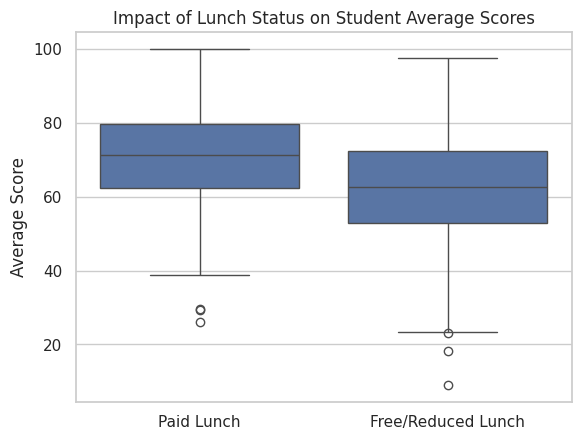

In [16]:
ax = sns.boxplot(x='Free/Reduced Lunch', y='Average Score', data=df)

ax.set_xticklabels(['Paid Lunch', 'Free/Reduced Lunch'])

plt.title('Impact of Lunch Status on Student Average Scores')
plt.ylabel('Average Score')
plt.xlabel('')
plt.show()

<ipython-input-17-df162efb0f84>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Test Prep', 'Completed Test Prep'])


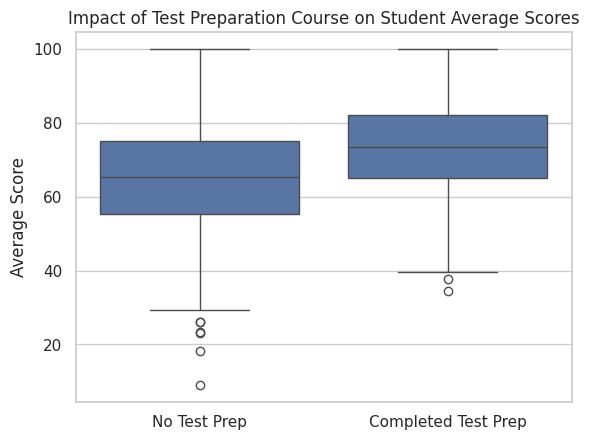

In [17]:
ax = sns.boxplot(x='Test Preparation Course', y='Average Score', data=df)

ax.set_xticklabels(['No Test Prep', 'Completed Test Prep'])

plt.title('Impact of Test Preparation Course on Student Average Scores')
plt.ylabel('Average Score')
plt.xlabel('')
plt.show()

Here we can see that kids from lower income families that qualify for free/reduced lunch tend to score lower on the tests, suggesting that
socioeconomic factors significantly influence academic performance.

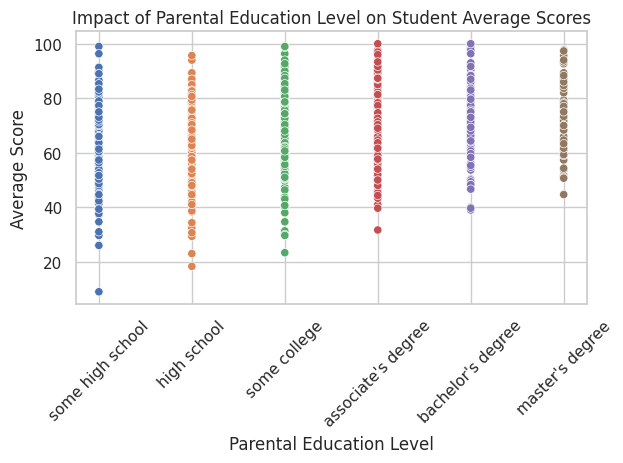

In [18]:
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
df['Parental Education Level'] = pd.Categorical(df['Parental Education Level'], categories=education_order, ordered=True)

ax = sns.scatterplot(x='Parental Education Level', y='Average Score', data=df, hue='Parental Education Level', palette='deep', legend=None)
plt.xticks(rotation=45)
plt.title('Impact of Parental Education Level on Student Average Scores')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()

This graph shows that while the highest scores are similar across all levels of parental education, the lowest scores tend to decrease as parental education decreases.

## 2.4

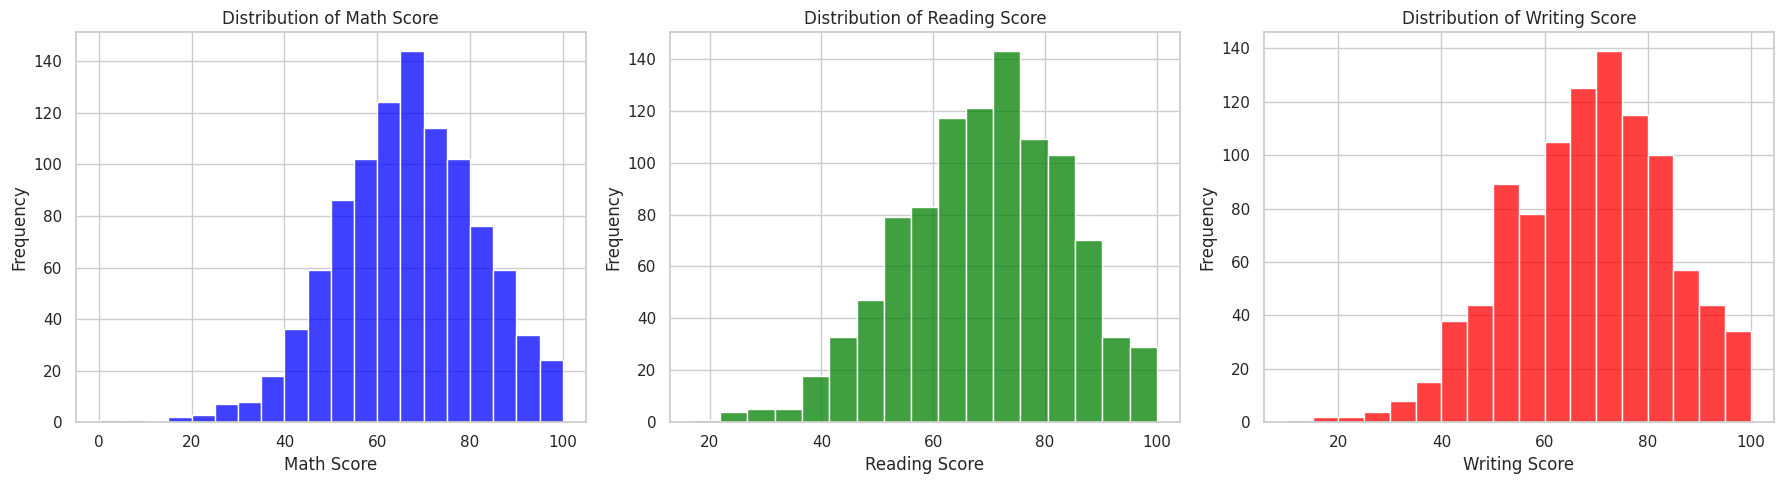

In [19]:
plt.figure(figsize=(18, 5))

score_types = ['Math Score', 'Reading Score', 'Writing Score']
colors = ['blue', 'green', 'red']

for i, score in enumerate(score_types):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[score], color=colors[i], binwidth=5)
    plt.title(f'Distribution of {score}')
    plt.xlabel(score)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distributions of math, reading, and writing scores are all similarly shaped, closely resembling a normal distribution with a slight left skew. The similarity between the mean and median, coupled with the mild skew, suggests that while the majority of students score around the middle range, a smaller group scores lower, slightly pulling the average down.

Distribution of Average Scores by Gender


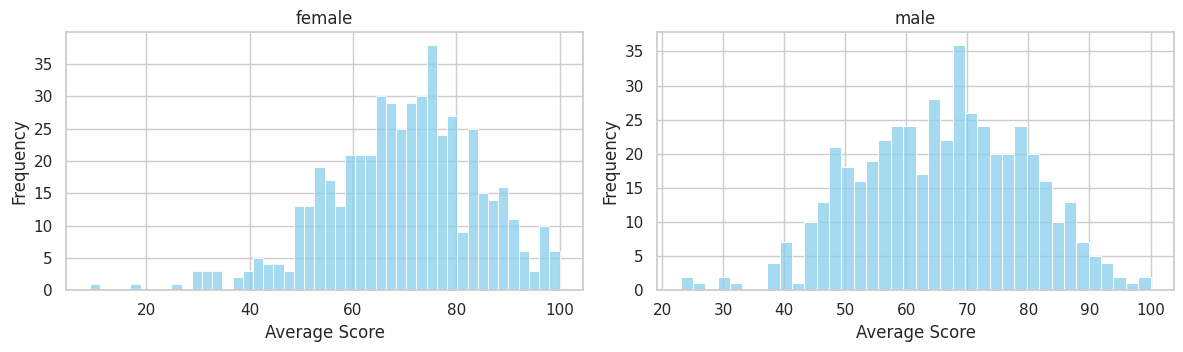



Distribution of Average Scores by Race/Ethnicity


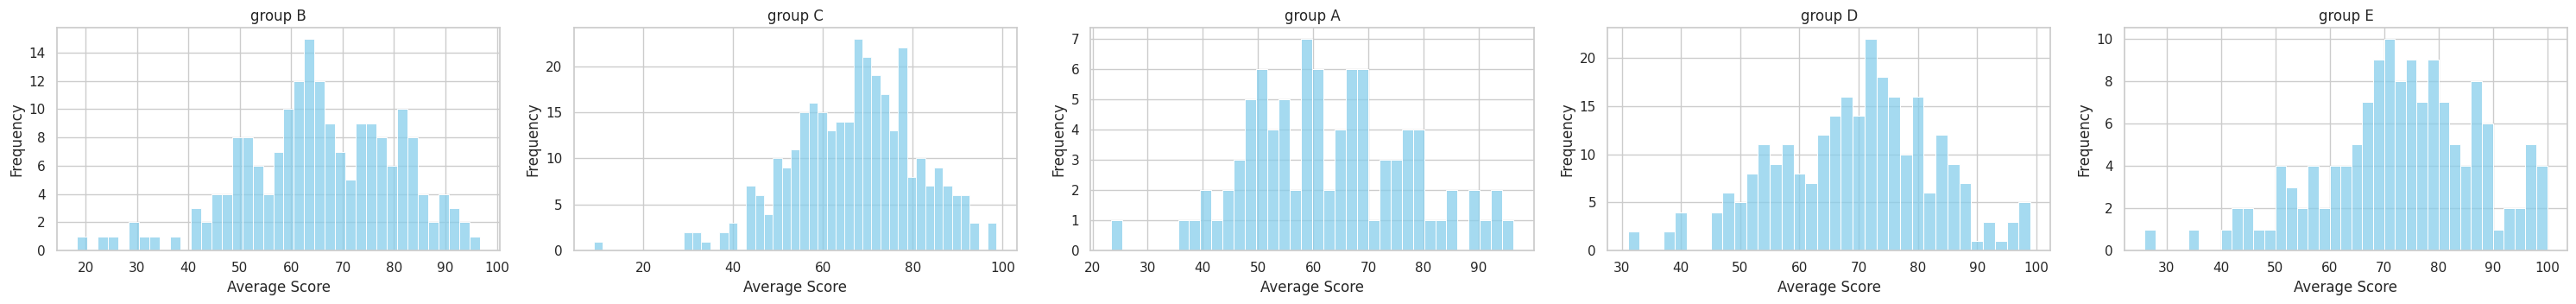



Distribution of Average Scores by Parental Education Level


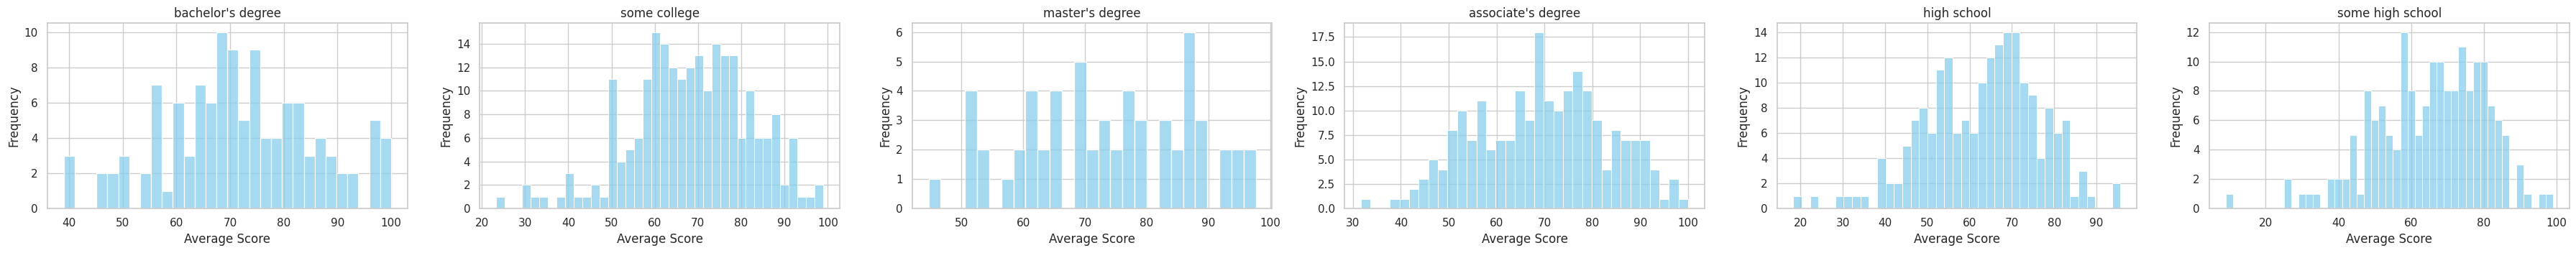



Distribution of Average Scores by Free/Reduced Lunch


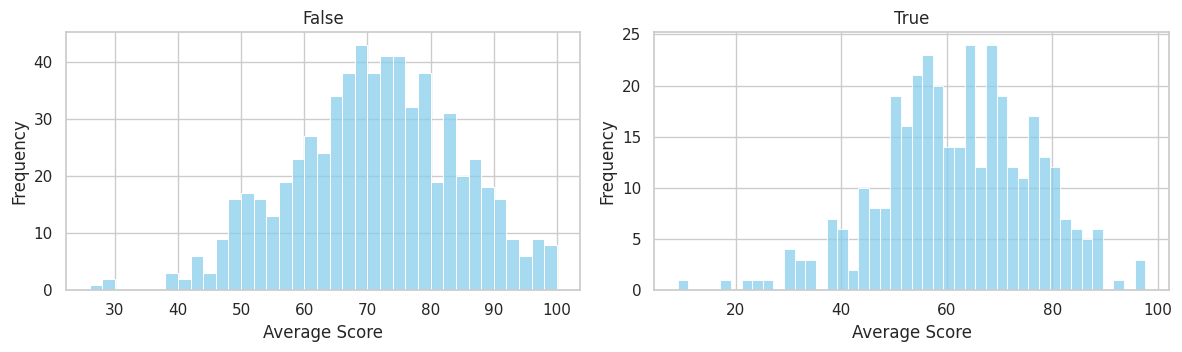



Distribution of Average Scores by Test Preparation Course


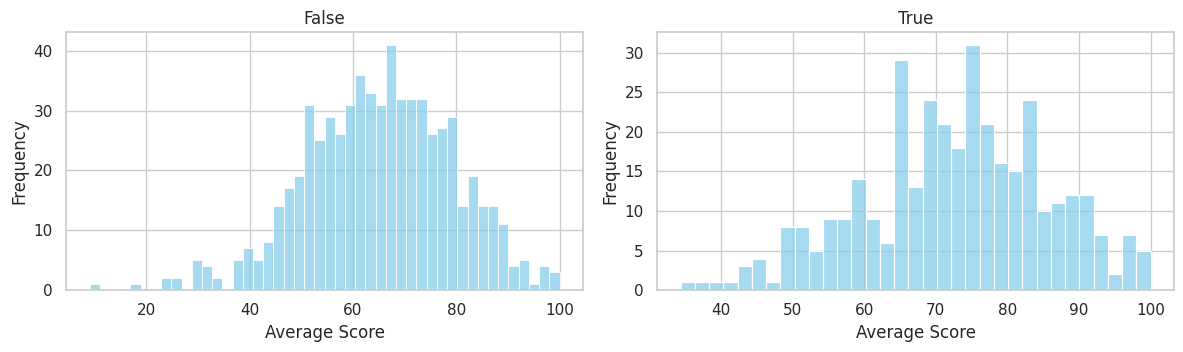

In [20]:
for qual_var in q_d_cols:
    print(f'Distribution of Average Scores by {qual_var}')
    unique_values = df[qual_var].unique()
    n_unique = len(unique_values)
    plt.figure(figsize=(6 * n_unique, 4))

    for i, value in enumerate(unique_values):
        plt.subplot(1, n_unique, i + 1)
        subset = df[df[qual_var] == value]
        sns.histplot(subset['Average Score'], color='skyblue', binwidth=2)
        plt.title(f'{value}')
        plt.xlabel('Average Score')
        plt.ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print('\n')

Further breaking down the distribution by categories reveals interesting comparisons. For example, the distribution for males is more centralized, while females show a distribution that skews to the right, indicating higher scores. Additionally, we observe that Group E shows a rightward skew as well, generally scoring higher than other racial groups.

These patterns suggest that students with different demographic backgrounds, such as gender and race, may have statistically different scores. We'd need to perform statistical tests to verify that the difference is statistically significant.

# 3

## 3.1

### Test #1

Let's begin by evaluating whether there is a significant difference in average scores based on parental educational background.

**Let:**

- $\mu_{\text{SHS}}$: Mean score of children whose parents have some high school education.
- $\mu_{\text{HS}}$: Mean score of children whose parents have a high school diploma.
- $\mu_{\text{SC}}$: Mean score of children whose parents have some college education.
- $\mu_{\text{AD}}$: Mean score of children whose parents have an associate's degree.
- $\mu_{\text{BD}}$: Mean score of children whose parents have a bachelor's degree.
- $\mu_{\text{MD}}$: Mean score of children whose parents have a master's degree.

**Null Hypothesis ($H_0$):**  
$$
H_0: \mu_{\text{SHS}} = \mu_{\text{HS}} = \mu_{\text{SC}} = \mu_{\text{AD}} = \mu_{\text{BD}} = \mu_{\text{MD}}
$$  
(There is no significant difference in the mean scores of children based on their parents' educational levels.)

A Type I error in this context would occur if we reject the null hypothesis and conclude that there are significant differences in children's average scores based on parental education, when in reality, no such differences exist. This error could lead to unnecessary interventions or resource allocation to address differences that are not actually present.

A Type II error would occur if we fail to reject the null hypothesis, concluding that there are no significant differences in average scores when, in fact, such differences do exist. This could mean missing important insights into how parental education influences children's performance, potentially overlooking opportunities for targeted support.

Here, we choose the ANOVA test because we are looking at the means of multiple groups.

We use the industry standard 95% significance level and 80% study power to balance the risks of errors. The 95% level limits the chance of a Type I error to 5%, while the 80% power means there is a 20% chance of making a Type II error, where we might fail to detect a true effect

In [21]:
alpha = 0.05
power = 0.80
beta = 1 - power

Z_alpha = stats.norm.ppf(1 - alpha / 2)
Z_beta = stats.norm.ppf(power)

sigma = df['Average Score'].std()
n = len(df['Average Score'])

mde = (Z_alpha + Z_beta) * sigma * np.sqrt(2 / n)

print(f'The Minimum Detectable Effect (MDE) is: {mde:.2f}')

The Minimum Detectable Effect (MDE) is: 1.79


Meaning that we are only able to detect differences in average scores that are at least 1.79 units. Any differences smaller than this would not be identified as statistically significant in our test.

### Test #2

Let's also assess whether there is a significant difference in students’ average scores based on whether they took a test preparation course.

**Null Hypothesis ($H_0$):**
$$
H_0: \mu_{\text{Prep}} = \mu_{\text{No Prep}}
$$  
(The mean scores of students who took the test preparation course are equal to those who did not take it.)


A Type I error in this context would occur if we reject the null hypothesis and conclude that taking the test preparation course has a significant effect on students' average scores, when in reality, it does not. This error could lead to unnecessary emphasis on the course's effectiveness, potentially diverting resources towards promoting or requiring the course without real benefits.

A Type II error would occur if we fail to reject the null hypothesis, concluding that the test preparation course has no significant effect on students' average scores when, in fact, it does. This could mean missing valuable insights into the course's impact, potentially overlooking an opportunity to improve student performance through targeted support.


Here we are comparing the means across two groups, so we use the t-test.

Again we use the industry standard 95% significance level and 80% study power.

Since we are again comparing means and using the same data, the MDE remains the same.

## 3.2

In [22]:
stat, p_value = stats.shapiro(df['Average Score'])

print(f'Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}')

if p_value > 0.05:
    print('The data appears to be normally distributed')
else:
    print('The data does not appear to be normally distributed')

Shapiro-Wilk Test Statistic: 0.9932, p-value: 0.0001
The data does not appear to be normally distributed


Still, because of our large sample size ($>30$), we can rely on the Central Limit Theorem to assume normality and proceed with our tests.

## 3.3

In [23]:
df

,Gender,Race/Ethnicity,Parental Education Level,Free/Reduced Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Average Score
0,female,group B,bachelor's degree,False,False,72,72,74,72.666667
1,female,group C,some college,False,True,69,90,88,82.333333
2,female,group B,master's degree,False,False,90,95,93,92.666667
3,male,group A,associate's degree,True,False,47,57,44,49.333333
4,male,group C,some college,False,False,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,False,True,88,99,95,94.000000
996,male,group C,high school,True,False,62,55,55,57.333333
997,female,group C,high school,True,True,59,71,65,65.000000
998,female,group D,some college,False,True,68,78,77,74.333333


In [24]:
# ANOVA
groups = [df[df['Parental Education Level'] == level]['Average Score'].values for level in df['Parental Education Level'].cat.categories]
anova_stat, anova_p_value = stats.f_oneway(*groups)

# t-test
prep_scores = df[df['Test Preparation Course'] == True]['Average Score']
no_prep_scores = df[df['Test Preparation Course'] == False]['Average Score']
t_stat, t_p_value = stats.ttest_ind(prep_scores, no_prep_scores, equal_var=False)

results_table = pd.DataFrame({
    'Test': ['ANOVA', 't-test'],
    'Statistic': [anova_stat, t_stat],
    'p-value': [anova_p_value, t_p_value]
})

results_table

,Test,Statistic,p-value
0,ANOVA,10.753147,4.381046e-10
1,t-test,8.594538,4.426725e-17


In [25]:
for _, row in results_table.iterrows():
    if row["p-value"] < 0.05:
        print(f"For the {row['Test']}, we reject the null hypothesis (p-value: {row['p-value']:.4f}).")
    else:
        print(f"For the {row['Test']}, we fail to reject the null hypothesis (p-value: {row['p-value']:.4f}).")

For the ANOVA, we reject the null hypothesis (p-value: 0.0000).
For the t-test, we reject the null hypothesis (p-value: 0.0000).


## 3.4

*See 3.1 for risks related to Type I & II errors*

**Data Science**

The results of the statistical tests provide strong evidence against the null hypotheses. For the ANOVA test, the p-value of 0.0000 indicates that we should reject the null hypothesis that mean scores are the same across different levels of parental education. This suggests that parental education is associated with differences in student scores, meaning that variations in parental education levels correspond with differences in student performance.

Similarly, the two-sample t-test, with a p-value of 0.0000, leads us to reject the null hypothesis that the mean scores are equal between students who took the test preparation course and those who did not. This result indicates that there is a significant difference in scores between students who participated in the test preparation course and those who did not. Therefore, both variables can be considered in predictive modeling of student test scores.

**Innovation**

The results highlight key opportunities for innovation in education. The significant impact of parental education on student performance suggests a need for solutions that bridge gaps for students with less educational support at home. Programs that provide additional resources or mentorship for these students could help level the playing field, creating a more equitable learning environment.

Similarly, the strong effect of test preparation courses on scores underscores the value of tailored study programs. This signals how resources that may not be readily accessible to all students due to their cost can significantly improve test preparation and impact students' scores. Working to make these courses more accessible could again level the playing field.

# 4

In [26]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.1 MB/s eta 0:00:00


In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/DESIGNTK 530/I-7/study_performance.csv')
df = df.rename(columns={
    'gender': 'Gender',
    'race_ethnicity': 'Race/Ethnicity',
    'parental_level_of_education': 'Parental Education Level',
    'lunch': 'Lunch Status',
    'test_preparation_course': 'Test Preparation Course',
    'math_score': 'Math Score',
    'reading_score': 'Reading Score',
    'writing_score': 'Writing Score'
})
df['Test Preparation Course'] = df['Test Preparation Course'].replace({'none': False, 'completed': True})
df = df.rename(columns={'Lunch Status': 'Free/Reduced Lunch'})
df['Free/Reduced Lunch'] = df['Free/Reduced Lunch'].replace({'free/reduced': True, 'standard': False})

education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
df['Parental Education Level'] = pd.Categorical(df['Parental Education Level'], categories=education_order, ordered=True)
df['Average Score'] = df[['Math Score', 'Reading Score', 'Writing Score']].mean(axis=1)

qualitative_variable = st.selectbox(
    'Select a qualitative variable for analysis:',
    ['Parental Education Level', 'Test Preparation Course', 'Free/Reduced Lunch', 'Race/Ethnicity', 'Gender']
)

fig_box = px.box(
    df,
    x=qualitative_variable,
    y='Average Score',
    category_orders={qualitative_variable: df[qualitative_variable].unique()},
    title=f'Impact of {qualitative_variable} on Average Scores',
    labels={qualitative_variable: qualitative_variable, 'Average Score': 'Average Score'},
)

fig_box.update_layout(
    xaxis_title=qualitative_variable,
    yaxis_title='Average Score',
    xaxis_tickangle=45,
    showlegend=False
)

# ChatGPT helped me with the interactive KDE plot
fig_kde = go.Figure()
colors = px.colors.qualitative.Plotly

for i, value in enumerate(df[qualitative_variable].unique()):
    subset = df[df[qualitative_variable] == value]
    label = f'{value}'

    kde = stats.gaussian_kde(subset['Average Score'])
    x_range = np.linspace(subset['Average Score'].min(), subset['Average Score'].max(), 100)
    y_values = kde(x_range)

    fig_kde.add_trace(
        go.Scatter(
            x=x_range,
            y=y_values,
            mode='lines',
            name=label,
            line=dict(color=colors[i], width=2),
        )
    )

fig_kde.update_layout(
    title=f'Density of Average Scores by {qualitative_variable}',
    xaxis_title='Average Score',
    yaxis_title='Density',
    showlegend=True,
    xaxis_tickangle=45,
)

st.title('Student Performance Analysis')
st.plotly_chart(fig_box)
st.plotly_chart(fig_kde)

p_value = None
test_name = ''

if df[qualitative_variable].nunique() > 2:
    # ANOVA for more than two groups
    groups = [df[df[qualitative_variable] == level]['Average Score'].values for level in df[qualitative_variable].unique()]
    anova_stat, p_value = stats.f_oneway(*groups)
    test_name = 'ANOVA'
    statistic = anova_stat
else:
    # t-test for two groups
    values = df[qualitative_variable].unique()
    group1_scores = df[df[qualitative_variable] == values[0]]['Average Score']
    group2_scores = df[df[qualitative_variable] == values[1]]['Average Score']
    t_stat, p_value = stats.ttest_ind(group1_scores, group2_scores, equal_var=False)
    test_name = 't-test'
    statistic = t_stat

st.subheader('Statistical Test Result')
st.write(f'**{test_name}**')
st.write(f'Statistic: {statistic:.4f}, p-value: {p_value:.4f}')

if p_value < 0.05:
    st.write('**Result:** Significant difference found.')
    st.write('**Interpretation:** The groups differ more than would be expected by chance, suggesting a likely influence from the tested factor.')
    st.write(f'**Confidence:** Given a p-value of {p_value:.4f}, there is less than a 5% probability that this result is due to random chance.')
else:
    st.write('**Result:** No significant difference found.')
    st.write('**Interpretation:** The groups do not show meaningful differences, which suggests the factor tested may not have an influence under these conditions.')
    st.write(f'**Confidence:** With a p-value of {p_value:.4f}, there is greater than 5% likelihood that these results are due to random variation.')

Writing app.py


In [28]:
!wget -q -O - ipv4.icanhazip.com
!streamlit run app.py & npx localtunnel --port 8501

35.237.28.71


Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.28.71:8501

  Stopping...
^C


# 5

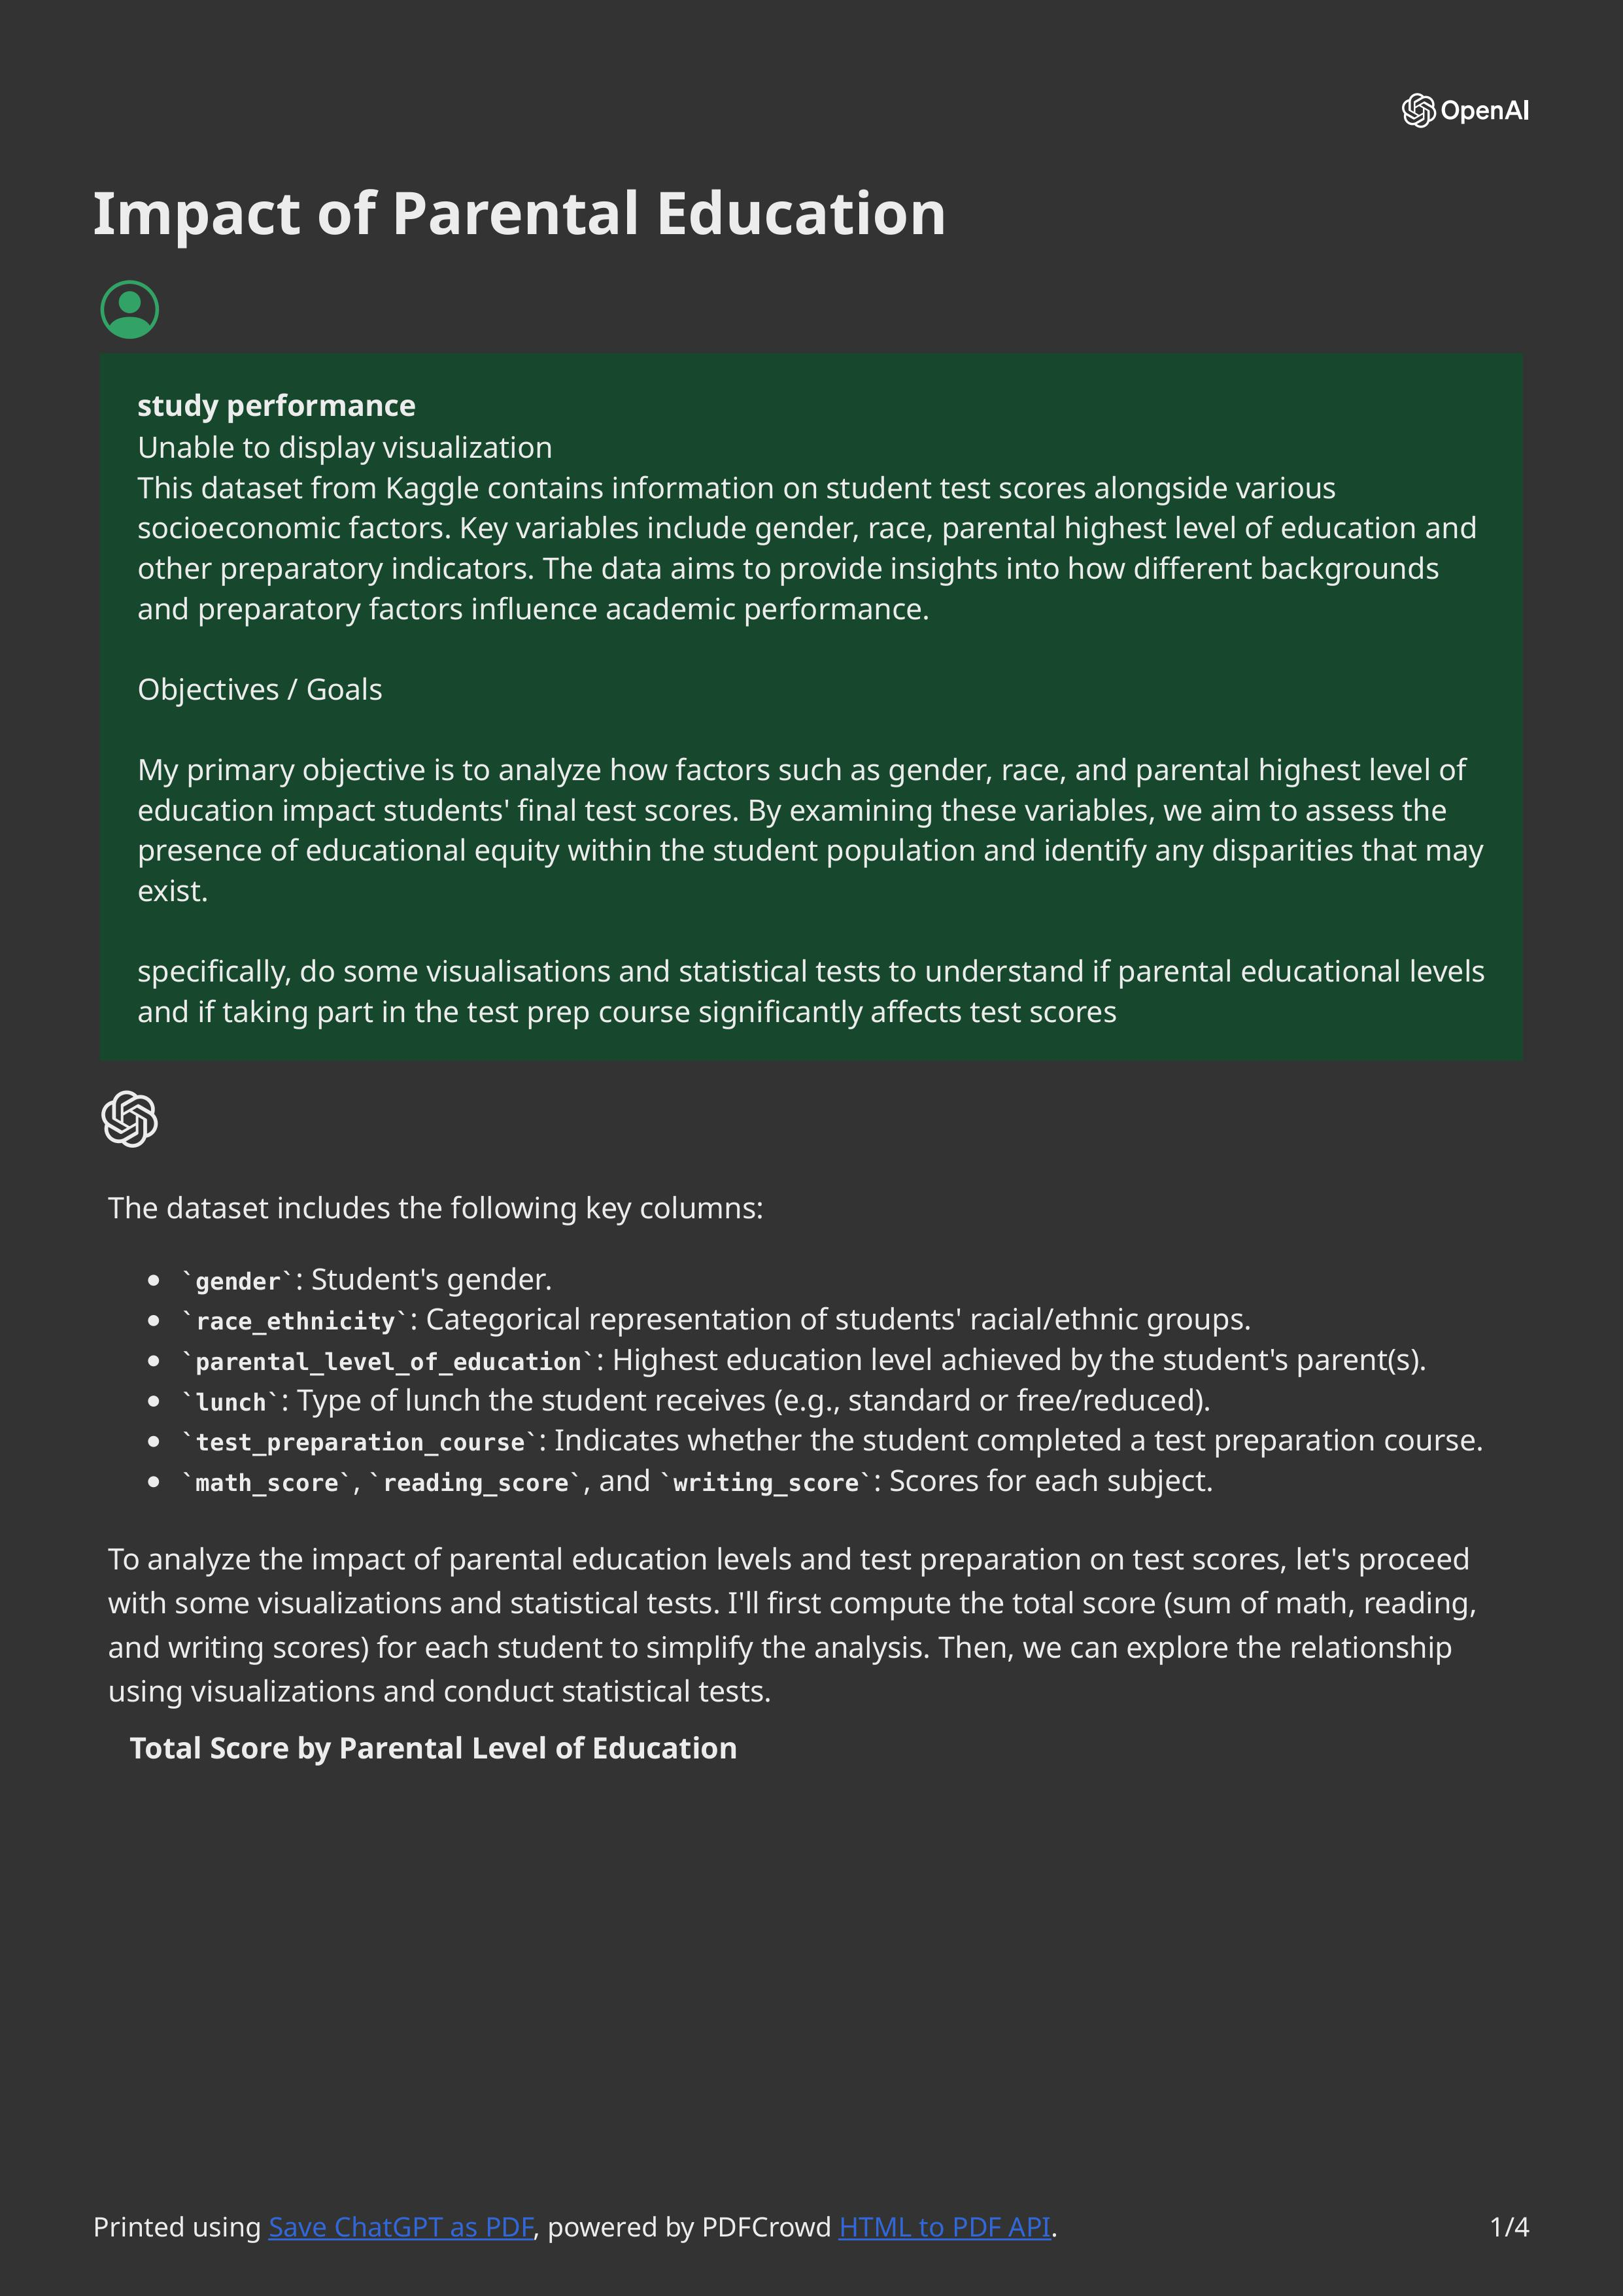

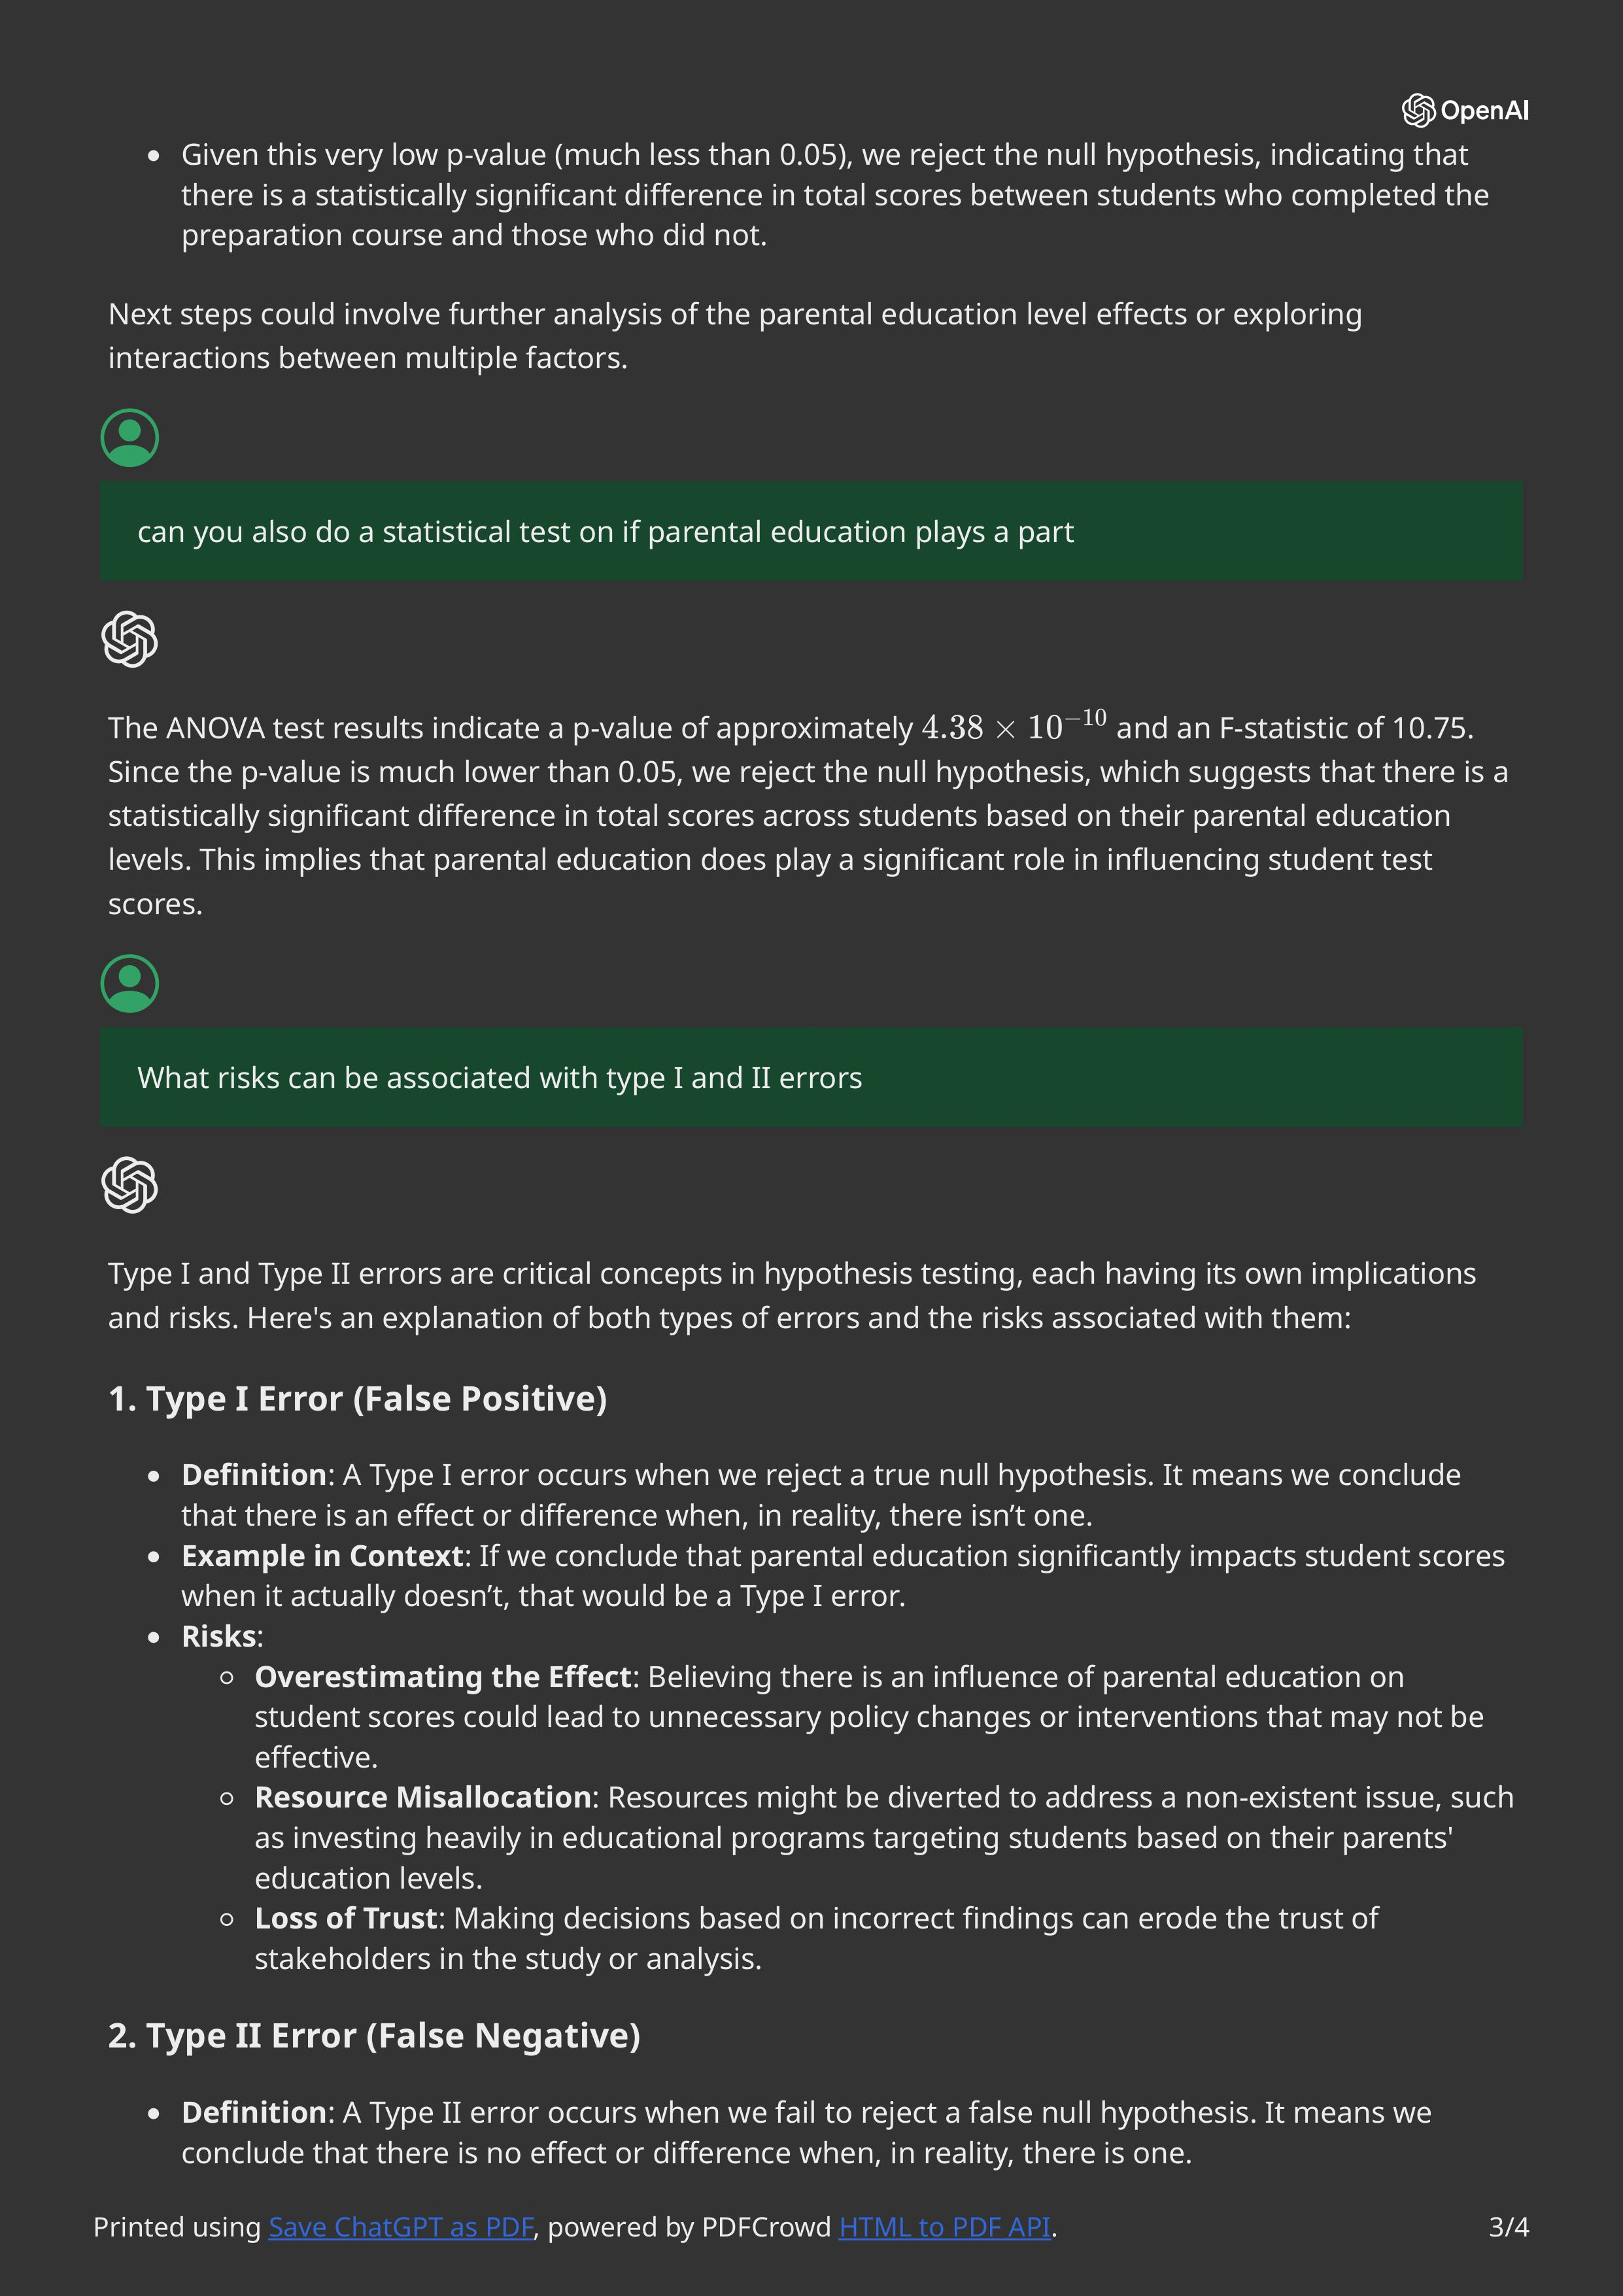

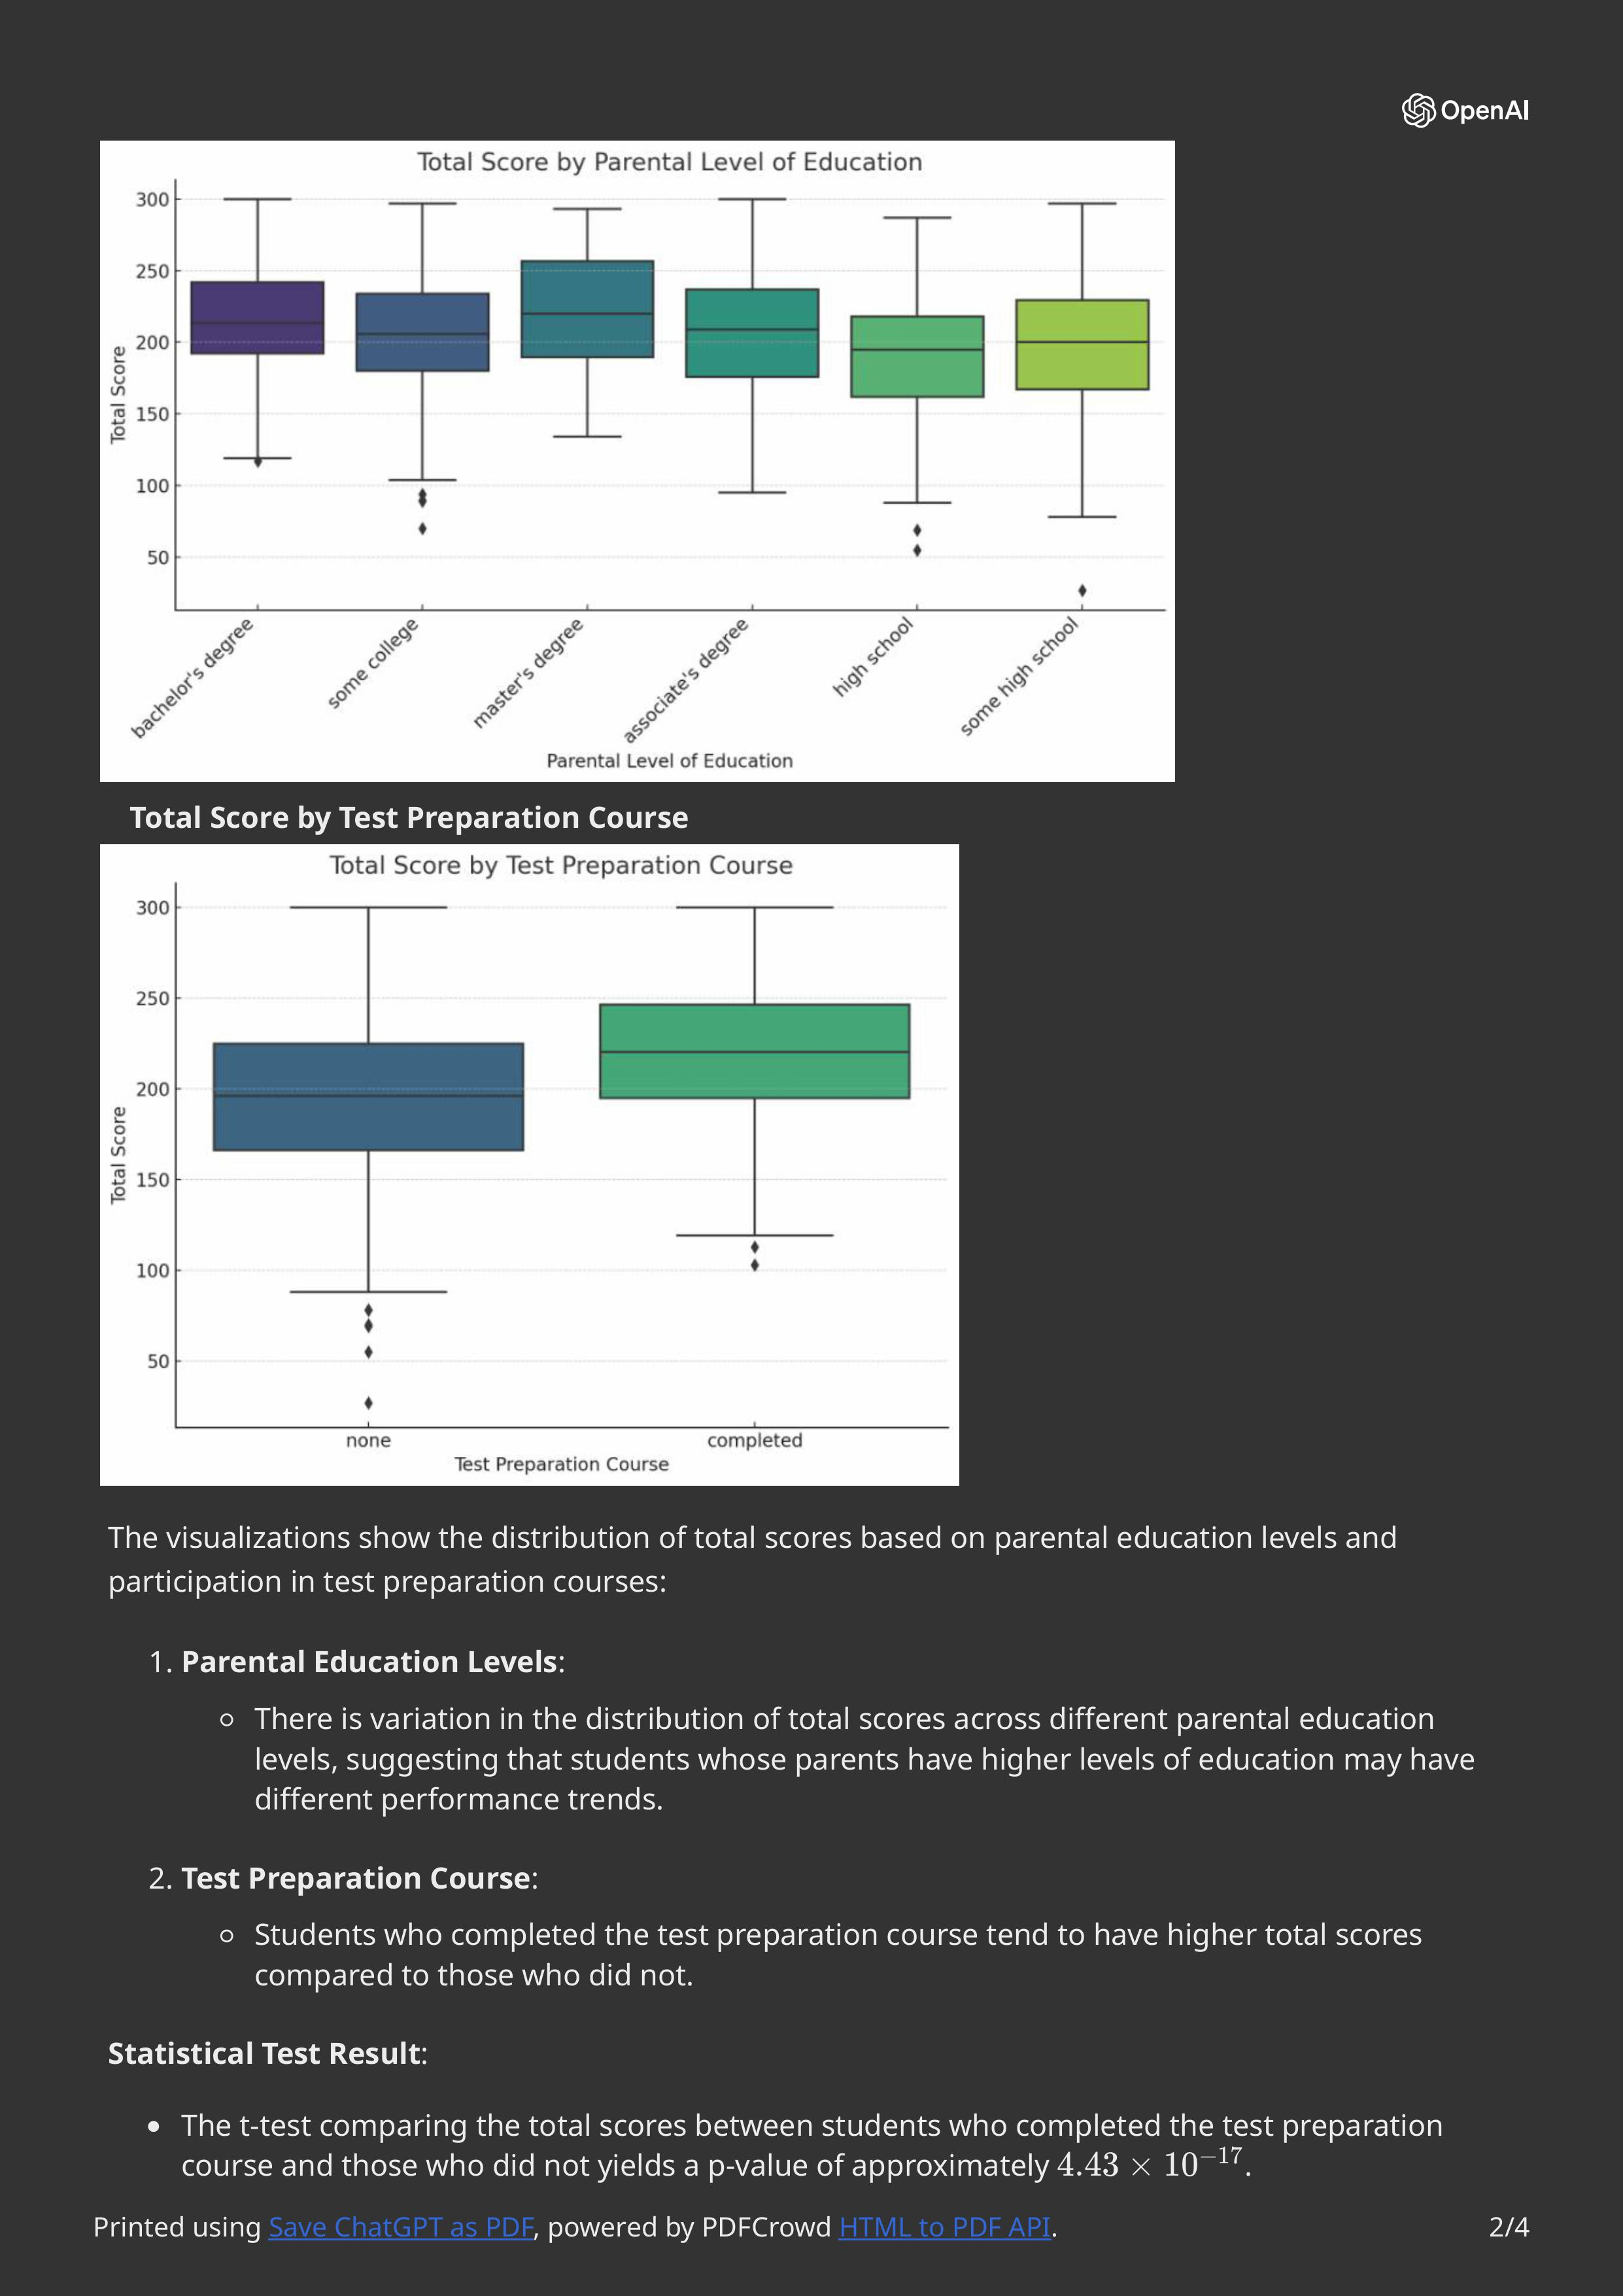

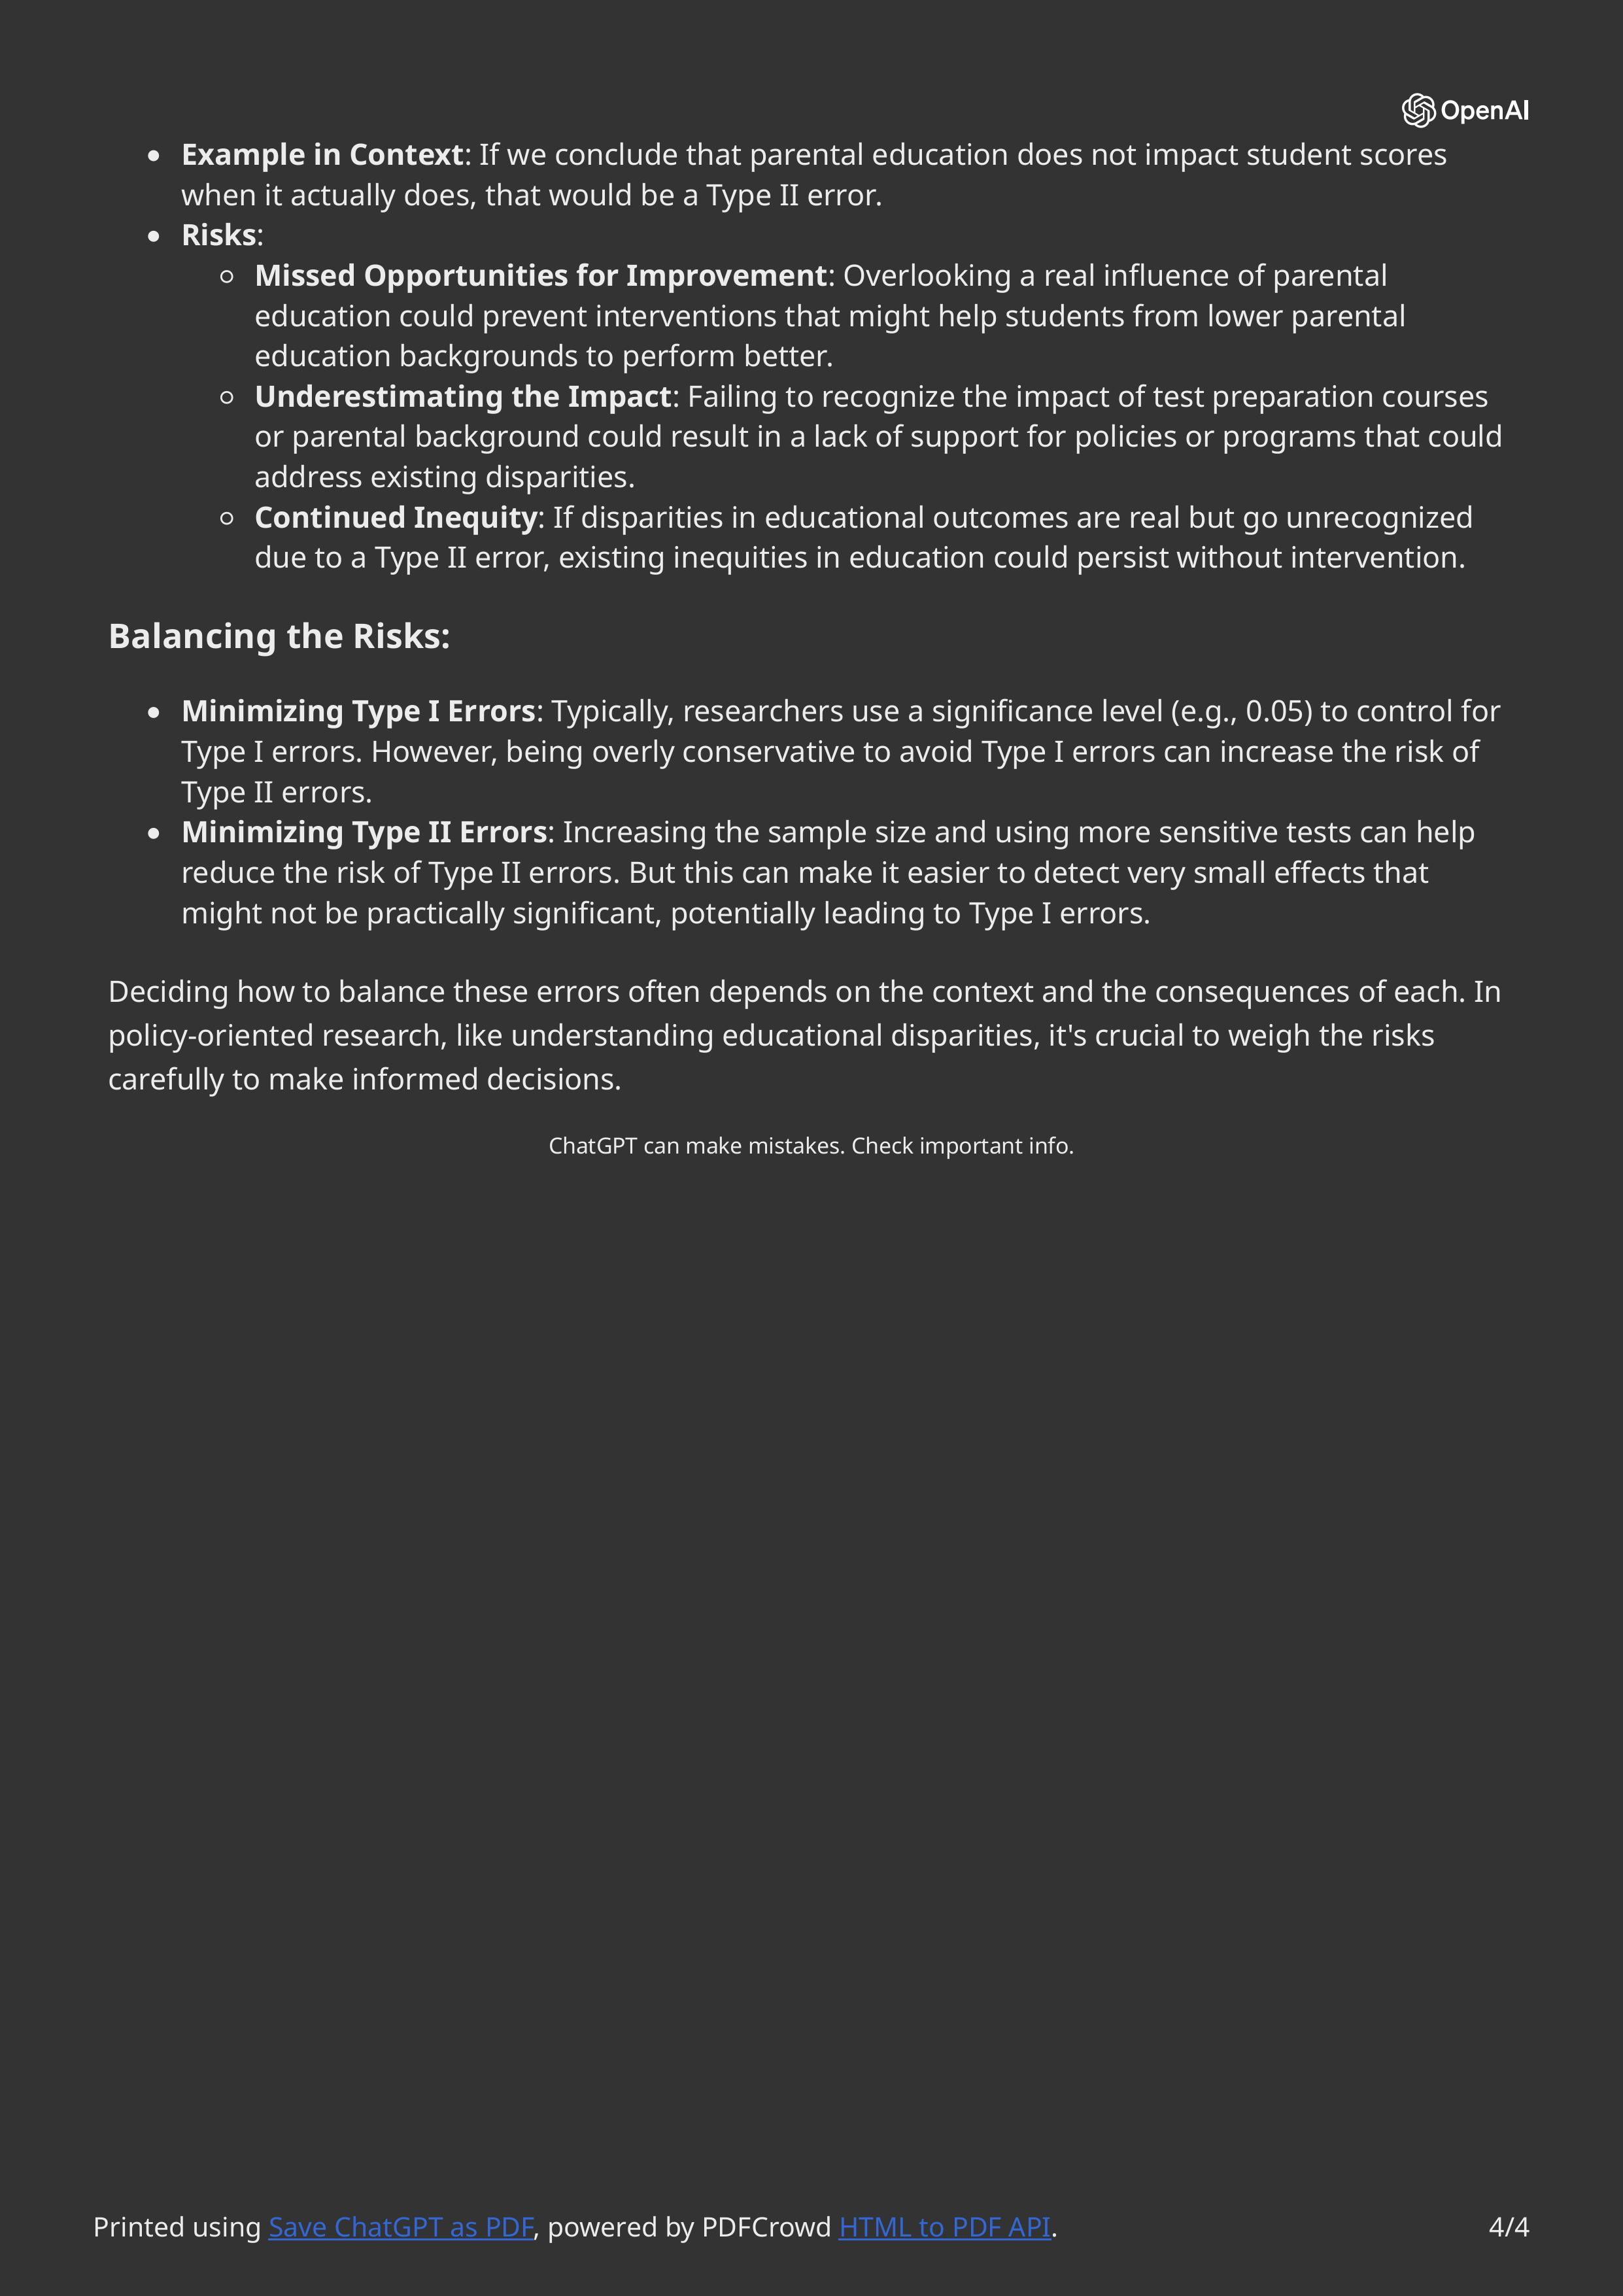

In [31]:
folder_path = '/content/drive/MyDrive/DESIGNTK 530/I-7/chatgpt'
for image_name in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image_name)
    display(Image(filename=image_path))

GPT-4o provided an impressive analysis, offering relevant visualizations (though not quite as polished as mine), describing the data, and performing the same A/B tests I conducted, with identical results. This really highlights the power of this technology in accelerating workflows when you have a clear idea of your goals and know what to prompt the model with.